In [3]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('survey.csv')
df1.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
df2 = pd.read_csv('steps.csv', sep=';')
df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


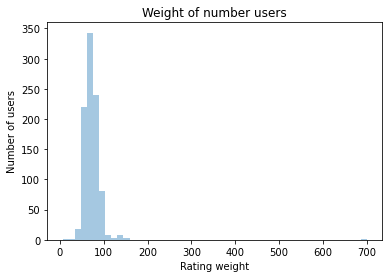

In [6]:
sns.distplot(df['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of number users')
plt.xlabel('Rating weight')
plt.ylabel('Number of users')
plt.show()

In [7]:
#To remove the inplausible weight, now we have to think ab it.
def above_200(x):
    if(x > 200.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_200)


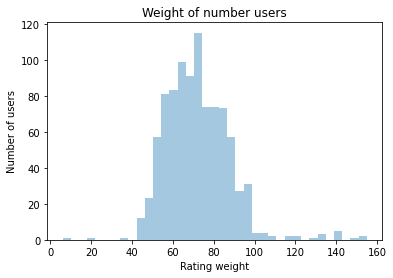

In [8]:
sns.distplot(df['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of number users')
plt.xlabel('Rating weight')
plt.ylabel('Number of users')
plt.show()

In [9]:
#try to get the mean from each runner in the dataframe.
df2['mean'] = df2.mean(axis=1)
mean_steps = df2['mean']
print(mean_steps)

0      10144.048193
1       5652.756098
2       8246.033557
3       3460.380952
4       5215.636364
           ...     
924     6223.902174
925     4723.921569
926     9986.135922
927    15499.780488
928     7536.239130
Name: mean, Length: 929, dtype: float64


/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


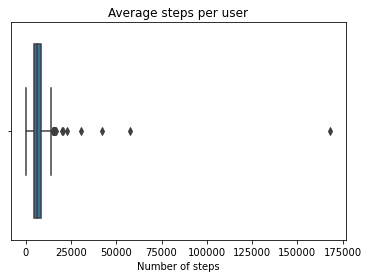

In [10]:
sns.boxplot(df2['mean'])
plt.title('Average steps per user')
plt.xlabel('Number of steps')
plt.show()
#I notice that there are some outliers

In [11]:
#I want to get rid of the outliers, so I looked up what the maximum number of steps were on a day.
#I found that those were around 20k. So I implemented that into the dataframe.
def under_25k(x):
    if(x > 25000.0): 
        return float('NaN')
    else: 
        return x
df2['mean'] = df2['mean'].apply(under_25k)

/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


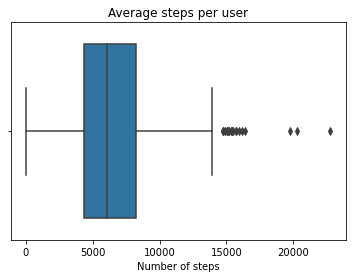

In [12]:
sns.boxplot(df2['mean'])
plt.title('Average steps per user')
plt.xlabel('Number of steps')
plt.show()

# Assigment:
#### Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)

In [13]:
#all_steps = df2(axis=1)
#print(all_steps)
number_steps = df2.dropna(axis=1)
print(number_steps)

df2['median'] = df2.median(axis=1)
median_steps = df2['median']

df2['var'] = df2.var(axis=1)
variance_steps = df2['var']

print(df2)
print(median_steps)
print(variance_steps)

      id
0      1
1      2
2      3
3      4
4      5
..   ...
924  925
925  926
926  927
927  928
928  929

[929 rows x 1 columns]
      id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1      2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2      3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3      4        NaN        NaN        NaN        NaN        NaN        NaN   
4      5        NaN        NaN        NaN        NaN        NaN        NaN   
..   ...        ...        ...        ...        ...        ...        ...   
924  925        NaN     4571.0    10471.0     5899.0    15295.0     9178.0   
925  926        NaN        NaN        NaN        NaN        NaN        NaN   
926  927        NaN        NaN        NaN     1623.0        NaN        NaN   
927  928        NaN        NaN    14411.0    14364.0    26629.0    13092.0   
928  929  

/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


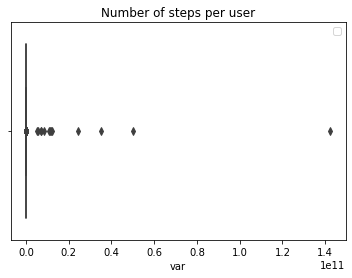

In [14]:
sns.boxplot(variance_steps)
plt.title('Number of steps per user')
#plt.axvline(median_steps, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
#plt.axvline(variance_steps, color='purple', label='variance') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


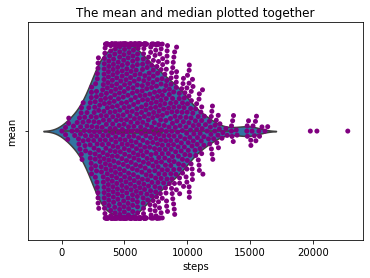

In [15]:
sns.violinplot(median_steps)
sns.swarmplot(df2['mean'], color='purple') #default color doesn't stand out
plt.title('The mean and median plotted together')
plt.ylabel('mean')
plt.xlabel('steps')
plt.show()

/Users/lauraosterholt/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


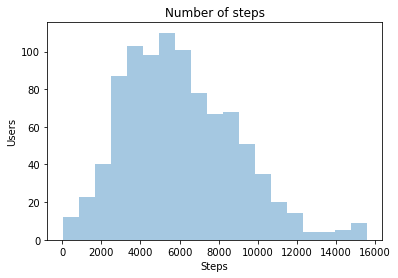

In [16]:
sns.distplot(median_steps, kde=False)
plt.title('Number of steps')
plt.xlabel('Steps')
plt.ylabel('Users')
plt.show()

In [17]:
df_new = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
sns.countplot(x="mean_steps", hue="gender", data=df_new)
plt.title("Mean of steps made by gender")
plt.show()

ValueError: Could not interpret input 'mean_steps'

# Result
#### I tried to get this far but it did not work out as I hoped unfortunately.
#### I did find the mean, median and variance of each user, but plotting them together was quite hard.

# Part 2
## To do:
#### Make a scatterplot matrix of the numerical variables
#### Make a correlation matrix of the numerical variables
#### Describe and interpret the results

Numerical variables:
-Age
-hh size
-Education
-Height
-Weight

In [26]:
age = df["age"]
height = df["height"]
hh_size = df["hh_size"]
education = df["education"]
weight = df["weight"]
print(age)
print(height)

0      25-34
1      35-44
2      25-34
3        <25
4      25-34
       ...  
924    45-54
925      <25
926    35-44
927    55-64
928    25-34
Name: age, Length: 929, dtype: object
0      178.0
1      180.0
2      180.0
3      178.0
4      167.0
       ...  
924    165.0
925    192.0
926    181.0
927    172.0
928    180.0
Name: height, Length: 929, dtype: float64


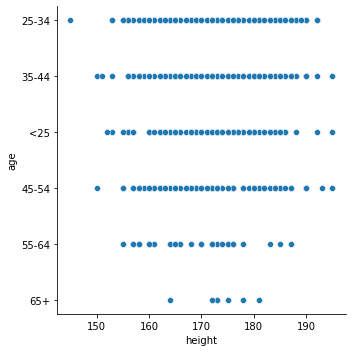

In [28]:
sns.relplot(x="height", y="age", data=df);

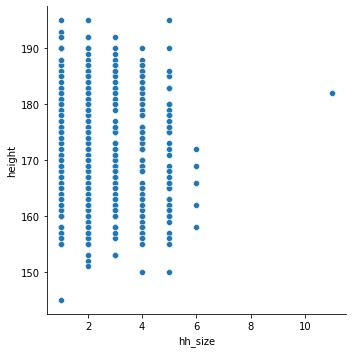

In [35]:
sns.relplot(x="hh_size", y="height", data=df);

#### Make a correlation matrix of the numerical variables

In [45]:
df.corr()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
id,1.000000,-0.022413,-0.007893,0.028926,0.009494,0.216274,-0.016681,-0.036408,-0.028250,0.085283,...,-0.165849,-0.217662,0.184487,0.034440,-0.024108,0.091816,-0.176542,-0.139740,0.004235,NaN
hh_size,-0.022413,1.000000,0.825585,-0.059704,0.001828,-0.309607,0.109732,0.043505,-0.105952,0.038843,...,-0.030032,0.187699,-0.042697,0.134342,0.044966,0.084060,0.036712,-0.011286,0.108789,NaN
education,-0.007893,0.825585,1.000000,-0.046343,-0.000364,-0.299855,0.084384,-0.032230,-0.115375,0.015764,...,-0.059606,0.197083,-0.135810,0.058244,0.037707,0.028195,-0.028467,-0.090332,0.084744,NaN
height,0.028926,-0.059704,-0.046343,1.000000,0.513935,-0.119334,-0.218262,-0.170664,0.057873,-0.172184,...,0.104313,0.143636,0.076255,0.039056,-0.055676,-0.136258,-0.096489,-0.102776,-0.085037,NaN
weight,0.009494,0.001828,-0.000364,0.513935,1.000000,-0.320722,-0.194979,-0.208488,0.033042,-0.189774,...,0.030755,-0.005585,-0.157785,-0.020255,-0.051473,0.019605,-0.100813,-0.022786,-0.027064,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9-5-2014,0.091816,0.084060,0.028195,-0.136258,0.019605,-0.561293,0.207743,0.014449,0.382719,0.157533,...,0.108286,0.239698,0.229121,0.305216,0.237616,1.000000,0.471976,0.529628,0.189719,NaN
10-5-2014,-0.176542,0.036712,-0.028467,-0.096489,-0.100813,-0.397148,0.080760,-0.096355,0.013752,0.277571,...,0.059474,0.198795,0.029982,0.089275,0.215038,0.471976,1.000000,0.535868,0.165333,NaN
11-5-2014,-0.139740,-0.011286,-0.090332,-0.102776,-0.022786,-0.056054,0.149747,0.015653,0.130365,0.338291,...,0.160146,0.328598,0.180989,0.046202,0.319591,0.529628,0.535868,1.000000,0.179937,NaN
12-5-2014,0.004235,0.108789,0.084744,-0.085037,-0.027064,NaN,0.072339,-0.155960,-0.344990,0.455109,...,0.275072,0.187501,0.395294,0.043860,-0.066239,0.189719,0.165333,0.179937,1.000000,NaN


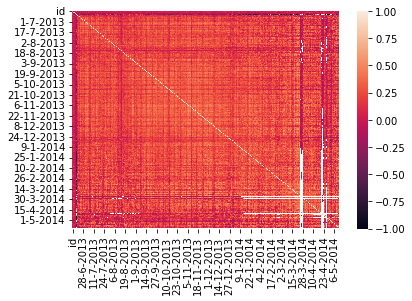

In [38]:
sns.heatmap(df.corr());

In [41]:
corr = df[['age', 'height', 'hh_size', 'weight', 'education']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,height,hh_size,weight,education
height,1.000000,-0.059704,0.513935,-0.046343
hh_size,-0.059704,1.000000,0.001828,0.825585
weight,0.513935,0.001828,1.000000,-0.000364
education,-0.046343,0.825585,-0.000364,1.000000


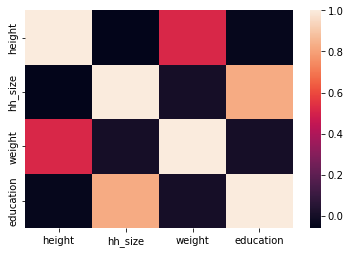

In [42]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

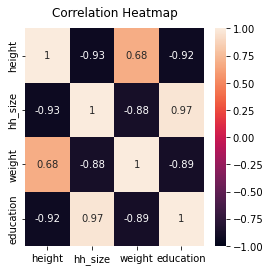

In [43]:
plt.figure(figsize=(4, 4))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

If I look at the correlation heatmap I see multiple correlations. I see that weight and hight have the least correlation. it's not a high correlation but there is a slight correlation visible 0,68. I also notice theat hh size and the education also looks like it's correlated because it has a high correlation score of 0,97.

Made by Laura Osterholt, student number: 1797529